## Exploratory Data Analysis

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
pd.set_option('float_format', '{:.2f}'.format)

In [44]:
lcbo = pd.read_csv('../data/processed/lcbo.csv', parse_dates=['release_date'])

In [45]:
lcbo.dtypes

name                     object
price                   float64
category                 object
description              object
sku                       int64
bottle_size               int64
alcohol_vol             float64
by                       object
sugar_content           float64
varietal                 object
release_date     datetime64[ns]
country                  object
region                   object
score                   float64
wine_type                object
group                    object
dtype: object

In [46]:
lcbo.select_dtypes(['float', 'int']).describe()

,price,sku,bottle_size,alcohol_vol,sugar_content,score
count,9499.00,9499.00,9499.00,9499.00,6266.00,3117.00
mean,72.26,463125.09,797.74,13.20,7.92,92.58
std,291.43,213801.02,328.42,1.30,13.67,2.47
min,3.10,26.00,3.00,4.50,2.00,86.00
25%,16.95,326033.50,750.00,12.50,3.00,91.00
50%,24.30,479832.00,750.00,13.50,4.00,92.00
75%,48.17,610456.00,750.00,14.00,8.00,94.00
max,11500.00,999979.00,6000.00,50.00,212.00,99.00


In [47]:
lcbo.select_dtypes(['object']).describe()

,name,category,description,by,varietal,country,region,wine_type,group
count,9499,9303,8459,9458,9290,9499,7675,9499,9499
unique,9212,431,8195,3247,430,38,203,4,2
top,Peller Family Vineyards Pinot Grigio,Chardonnay,"Easy drinking, refreshing white wine, sourced ...","Arterra Wines Canada, Inc.",Chardonnay,France,California,red,VINTAGES
freq,4,815,4,108,761,2084,932,5567,4882


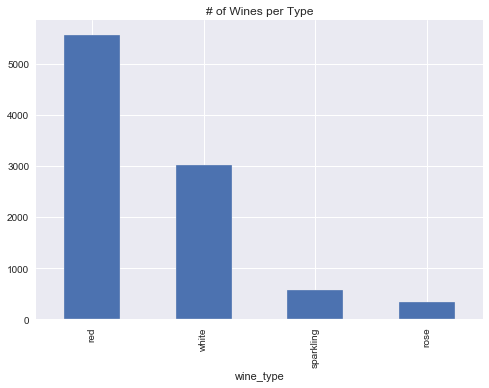

In [51]:
(lcbo.groupby('wine_type')['sku']
     .count()
     .sort_values(ascending=False)
     .plot(kind='bar'));
plt.title('# of Wines per Type');

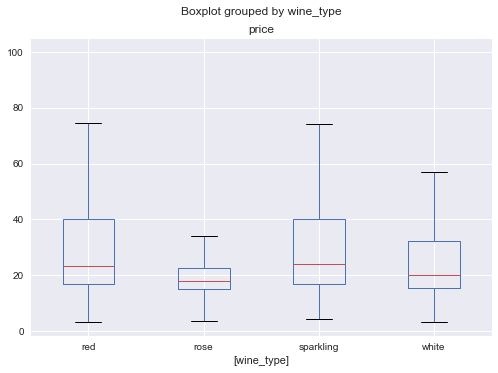

In [57]:
lcbo[lcbo.price < 100].boxplot(column=['price'], by=['wine_type']);

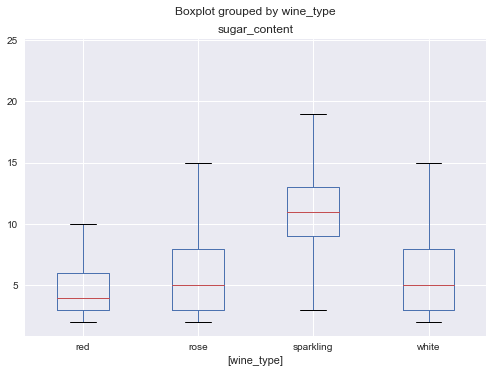

In [61]:
lcbo[lcbo.sugar_content < 25].boxplot(column=['sugar_content'], by=['wine_type']);

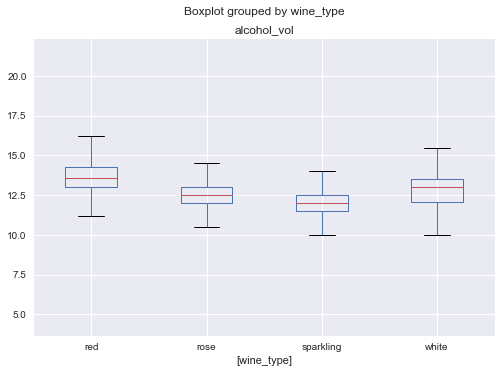

In [65]:
lcbo[lcbo.alcohol_vol < 30].boxplot(column=['alcohol_vol'], by=['wine_type']);

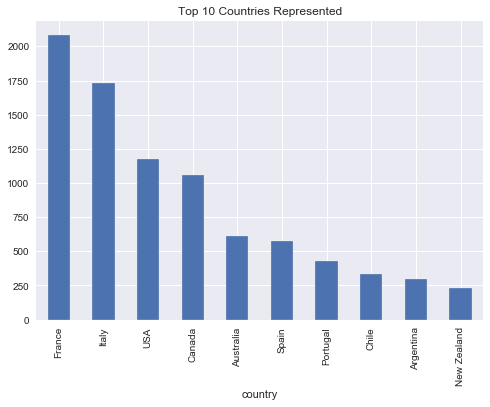

In [76]:
(lcbo.groupby(['country'])['sku']
     .count()
     .sort_values(ascending=False)[:10]
     .plot(kind='bar'));
plt.title('Top 10 Countries Represented');

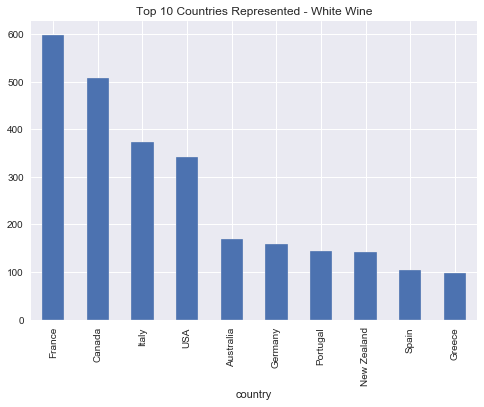

In [83]:
(lcbo.query('wine_type == "white"')
     .groupby(['country'])['sku']
     .count()
     .sort_values(ascending=False)[:10]
     .plot(kind='bar'));
plt.title('Top 10 Countries Represented - White Wine');

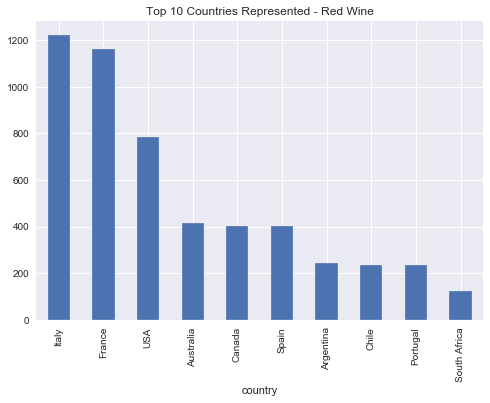

In [85]:
(lcbo.query('wine_type == "red"')
     .groupby(['country'])['sku']
     .count()
     .sort_values(ascending=False)[:10]
     .plot(kind='bar'));
plt.title('Top 10 Countries Represented - Red Wine');